In [1]:
import pandas as pd
import numpy as np
from src.eda_methods import show_barplot, load_data

In [2]:
old_commits, new_commits, cc_df, bic = load_data('accumulo')

In [3]:
# selects cochange of at least two components with confidence higher that 0.5
relevant_cc =\
    cc_df[
        (cc_df.support_count > 1) & (cc_df.confidence >= 0.5)
    ].reset_index(drop=True).copy()

# relevant_cc = cc_df.reset_index(drop=True).copy()

# frees memory
# del cc_df

**Note** that the hashes for cochange are the same as in new_commits but the hashes for bug introducing commits (bic) is the same as in old_commits. Thus, we must convert bic hashes into new_commits hashes.

In [4]:
# relevant_cc.iloc[0].commit_hash[0] in new_commits.values

# drops duplicated hashes 
bic = bic[~bic.duplicated()].reset_index(drop=True)
print('Number of bug introducing commits: {0}'.format(len(bic)))

Number of bug introducing commits: 775


In [5]:
# creates a dataframe to support conversion of old hashes into new ones
conv_df = pd.DataFrame()
conv_df['old_hash'] = old_commits.sort_index()
conv_df['new_hash'] =\
    new_commits.sort_index()\
    .reset_index(drop=True)[
        old_commits\
        .sort_index()\
        .reset_index(drop=True)\
        .index
    ].values

In [6]:
# converts bic's old hashes into new ones
bic =\
    conv_df.set_index('old_hash')\
    .squeeze()[bic.values]\
    .reset_index(drop=True)

### > How frequent are commits that introduce bugs?

In [7]:
# len(np.unique(bic.values)) / len(np.unique(old_commits.values))
len(np.intersect1d(bic.values, new_commits.values)) / len(np.unique(new_commits.values))

0.07531584062196307

### > How common is cochange in the project?

In [8]:
print(
    '{0:.3f} of all commits show cochange between components (support > 1, confidence >= 0.5).'
    .format(
        len(np.unique(np.hstack(relevant_cc.commit_hash.values))) / len(np.unique(old_commits.values))
    )
)

0.067 of all commits show cochange between components (support > 1, confidence >= 0.5).


### > Of all commits with cochange dependency, how many introduce bugs?

In [9]:
len(np.intersect1d(np.hstack(relevant_cc.commit_hash.values), bic.values)) / len(np.unique(np.hstack(relevant_cc.commit_hash.values)))

0.11661807580174927

### > Of all commits that introduce bugs, how many have cochange dependency?

In [10]:
len(np.intersect1d(np.hstack(relevant_cc.commit_hash.values), bic.values)) / len(bic.values)

0.1032258064516129

## Distribuition of bug introducing commits over cochange dependency support (level)

### > Broad Overview

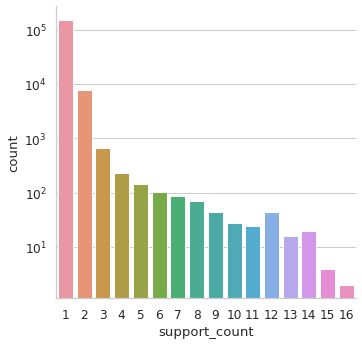

In [11]:
show_barplot(cc_df, 'support_count')

In [16]:
# hashes the list of commits to check for duplicates
cc_df['id_hash'] = cc_df.commit_hash.apply(lambda x: hash(tuple(x)))

In [25]:
print(
    'Unique hashes of list of commit_hash: {0}\n'
    .format(
        len(cc_df) - cc_df.set_index('id_hash').index.duplicated().sum()
    )
    + 'Should the order of components influence the co-change dependency? (a,b != b,a ?)'
)

Duplicated hashes of list of commit_hash: 1950
Should the order of components influence the co-change dependency? (a,b != b,a ?)


In [53]:
cc_df[~cc_df.set_index('id_hash').index.duplicated()]

,support_count,confidence,commit_hash,id_hash
0,1,1.0000,[f0dba1509f79b7a333b02d0be969cb419ae7f0ca],-2737590930322960619
1,1,1.0000,[4afcea5c5d6283f14e5c404311f3f07559b4d496],4811164177397362014
2,1,1.0000,[047b1c210d87fe53548ffbda2ac29ef946dd16bf],-3802493919335496951
3,2,1.0000,"[58342fbc4394630f2fe736e2fe2f4bbc0619c271, 6e1...",5901592404443224657
4,1,1.0000,[dd4b075a9b2e83111476588e70e1cac2363e0ad5],-4365943625520001301
...,...,...,...,...
147851,1,1.0000,[0067c81748358e71898487c5e8a87c518a2e967c],691449488202457867
148005,12,0.7500,"[bec6fde0f7c4fe8df7fa2f33651bb5be16890496, 194...",7296896976348686153
149195,1,0.3333,[5231242fafa924b56034123d6c6f4d6f244e5839],5513774072079919408
150535,2,0.1818,"[dab4e58d168a1c2152fafe8b6b0024b38d9f246c, fd7...",4412466395448172371
